In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def compute_daily_yield(data):
    if data.empty:
        return pd.Series(dtype=float)
    total_orig = data.groupby("LoanID")["OriginatedAmount"].first().sum()
    daily_paid = data.groupby("Days_Since_Orig")["PaidOffPaymentAmount"].sum().cumsum()
    return daily_paid / total_orig

In [3]:
latest = pd.read_csv("yieldcurvedata_1007.csv")
july = pd.read_csv("yieldcurvedata_730.csv")
august = pd.read_csv("yieldcurvedata_820.csv")

In [4]:
def preprocess_data(df, name):
    """Preprocess yield curve data"""
    df = df.copy()
    df["OriginationDate"] = pd.to_datetime(df["OriginationDate"])
    df = df.dropna(subset=["Days_Since_Orig", "OriginatedAmount", "PaidOffPaymentAmount", "Frequency"])
    df = df[df["PaymentStatus"] == "D"]
    df["Days_Since_Orig"] = df["Days_Since_Orig"].astype(int)
    df["OrigMonth"] = df["OriginationDate"].dt.to_period("M")
    print(f"{name} data: {len(df)} records, {df['LoanID'].nunique()} unique loans")
    return df

latest = preprocess_data(latest, "Latest")
july = preprocess_data(july, "July") 
august = preprocess_data(august, "August")

Latest data: 437613 records, 92958 unique loans
July data: 388277 records, 83927 unique loans
August data: 404144 records, 87045 unique loans


In [70]:
months_analysis = {
    '2024 Nov': [pd.Period('2024-11')],
    '2024 Dec': [pd.Period('2024-12')],
    '2025 Jan': [pd.Period('2025-01')],
    '2025 Feb': [pd.Period('2025-02')],
    '2025 Mar': [pd.Period('2025-03')],
    '2025 Apr': [pd.Period('2025-04')],
    '2025 May': [pd.Period('2025-05')],
    '2025 Jun': [pd.Period('2025-06')],
    '2025 Jul': [pd.Period('2025-07')],
    '2025 Aug': [pd.Period('2025-08')],
}

# Function to get monthly data
def get_monthly_data(df, months_list):
    return df[df['OrigMonth'].isin(months_list)]

# Colors for each month
month_colors = {
    '2024 Nov': 'black',
    '2024 Dec': 'blue',
    '2025 Jan': 'green',
    '2025 Feb': 'red',
    '2025 Mar': 'grey',
    '2025 Apr': 'orange',
    '2025 May': 'yellow',
    '2025 Jun': 'brown',
    '2025 Jul': 'purple',
    '2025 Aug': 'pink'
}

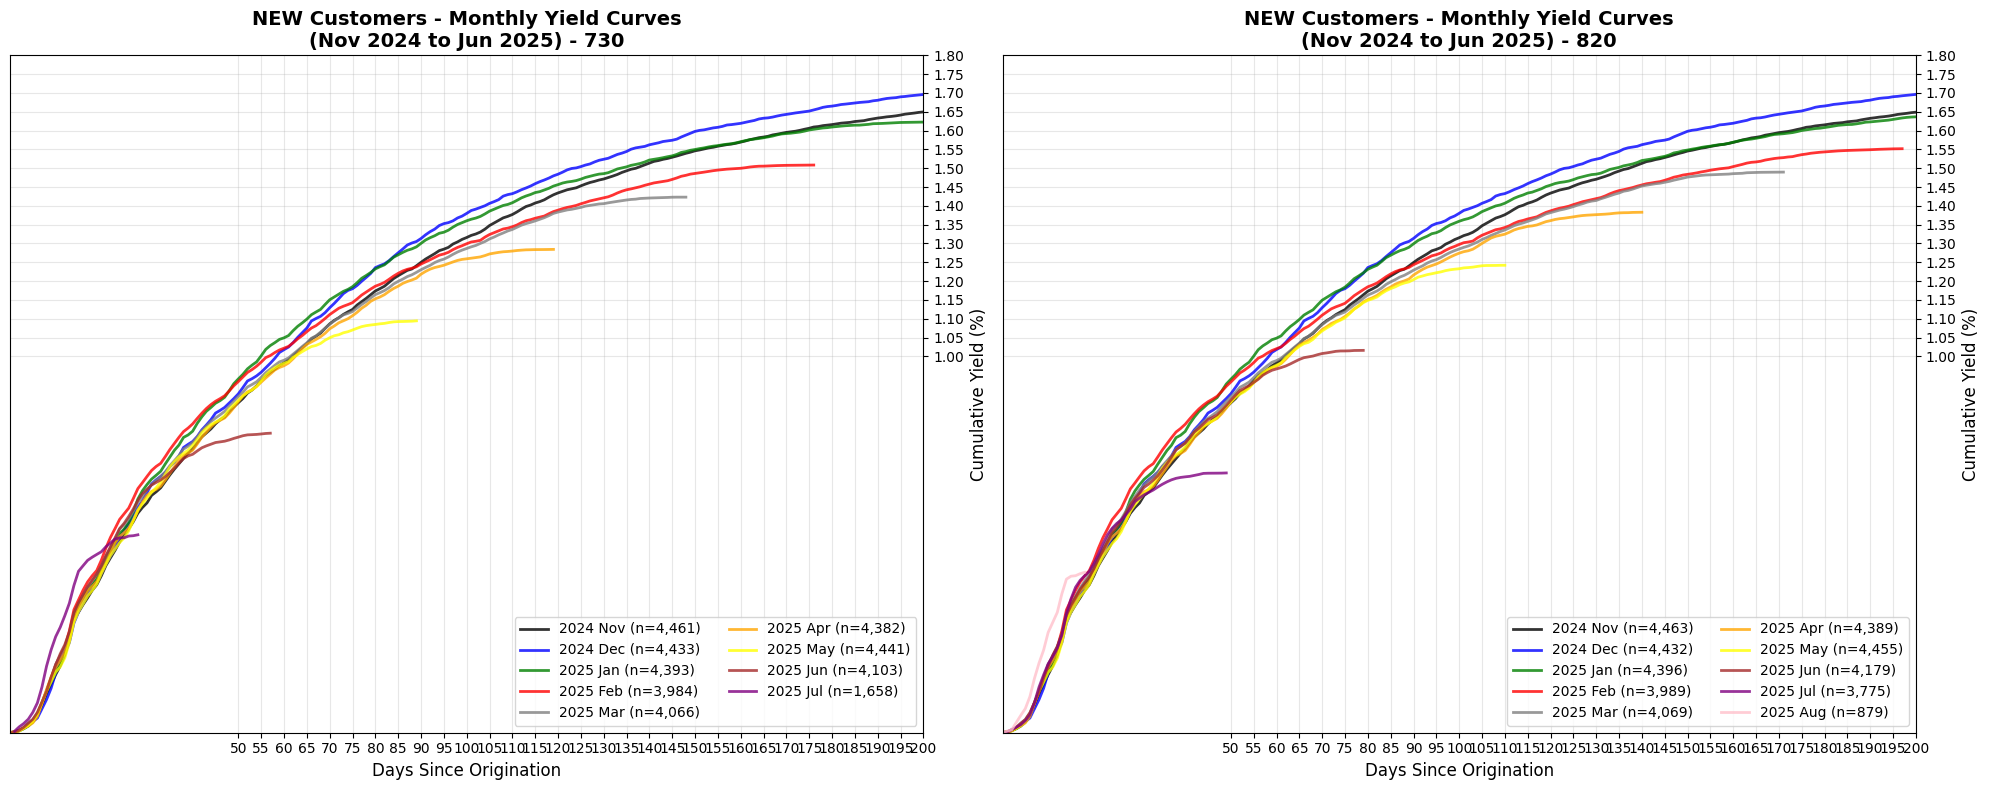

In [ ]:
# NEW CUSTOMERS - Monthly Yield Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

for month_name, months in months_analysis.items():
    monthly_data = get_monthly_data(july, months)
    
    if not monthly_data.empty:
        yield_curve = compute_daily_yield(monthly_data)
        loan_count = monthly_data['LoanID'].nunique()
        
        if not yield_curve.empty:
            ax1.plot(yield_curve.index, yield_curve.values,
                   color=month_colors[month_name], 
                   linewidth=2, 
                   label=f'{month_name} (n={loan_count:,})',
                   alpha=0.8)

# Formatting
ax1.set_xlabel('Days Since Origination', fontsize=12)
ax1.set_ylabel('Cumulative Yield (%)', fontsize=12)
ax1.set_title('NEW Customers - Monthly Yield Curves\n(Nov 2024 to Jun 2025) - 730', 
             fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 200)
ax1.set_ylim(0.0, 1.8)
ax1.yaxis.set_label_position("right")
ax1.yaxis.tick_right()  
ax1.set_yticks(np.arange(1.0, 1.85, 0.05))
ax1.set_xticks(np.arange(50, 201, 5))  # 15-day increments from 50 to 200
ax1.legend(fontsize=10, loc='lower right', ncol=2)

for month_name, months in months_analysis.items():
    monthly_data = get_monthly_data(august, months)
    
    if not monthly_data.empty:
        yield_curve = compute_daily_yield(monthly_data)
        loan_count = monthly_data['LoanID'].nunique()
        
        if not yield_curve.empty:
            ax2.plot(yield_curve.index, yield_curve.values,
                   color=month_colors[month_name], 
                   linewidth=2, 
                   label=f'{month_name} (n={loan_count:,})',
                   alpha=0.8)

# Formatting
ax2.set_xlabel('Days Since Origination', fontsize=12)
ax2.set_ylabel('Cumulative Yield (%)', fontsize=12)
ax2.set_title('NEW Customers - Monthly Yield Curves\n(Nov 2024 to Jun 2025) - 820', 
             fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 200)
ax2.set_ylim(0.0, 1.8)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()  
ax2.set_yticks(np.arange(1.0, 1.85, 0.05))
ax2.set_xticks(np.arange(50, 201, 5))  # 15-day increments from 50 to 200
ax2.legend(fontsize=10, loc='lower right', ncol=2)

plt.tight_layout()
plt.show()

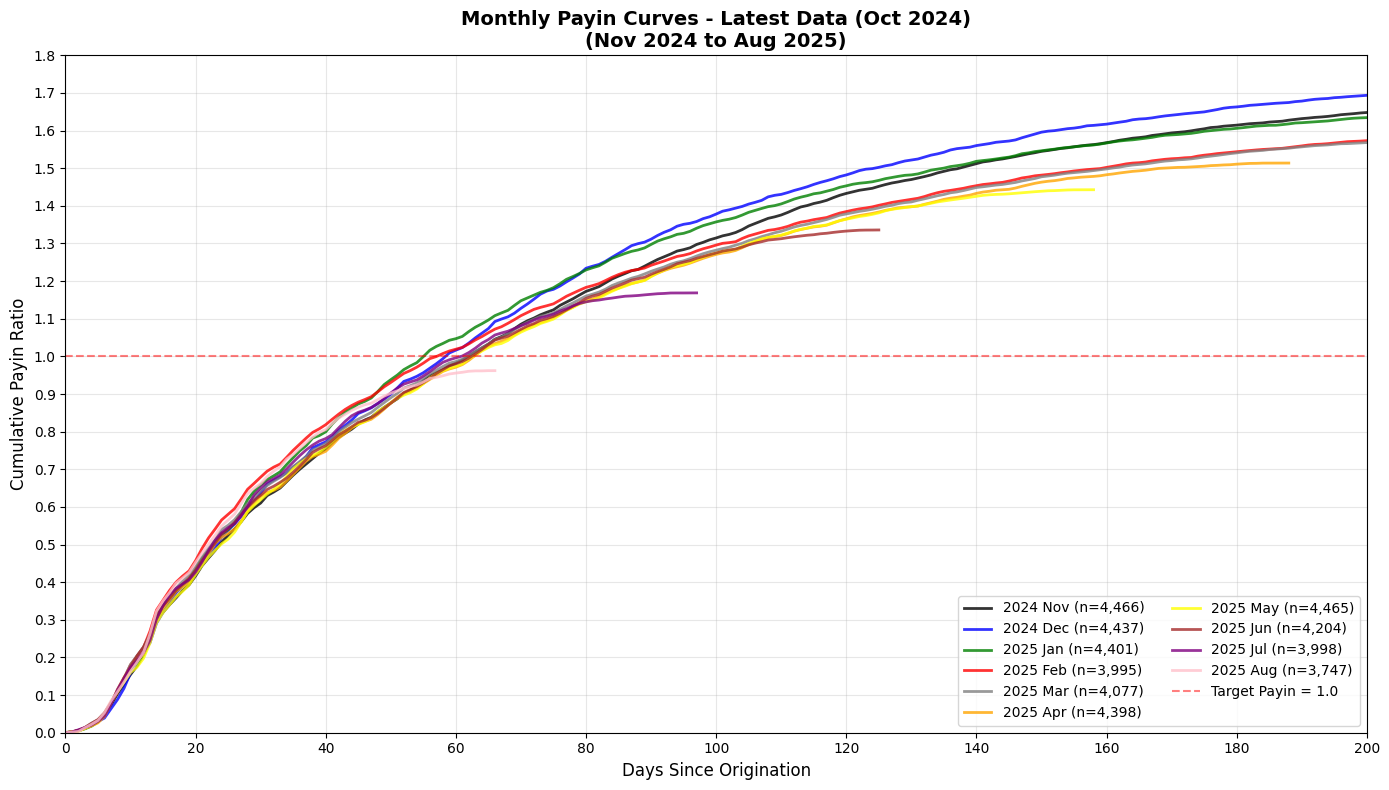

PAYIN SUMMARY FOR JULY MONTHS (Latest Data)

2025 Jul (3,998 loans, $3.3M originated):
  Day  30: 0.650
  Day  60: 0.996
  Day  90: 1.165
  Day 120: 1.169
  Day 150: 1.169
  Day 180: 1.169


In [30]:
# Create payin plot for transactions using latest data in July
fig, ax = plt.subplots(figsize=(14, 8))

for month_name, months in months_analysis.items():
    monthly_data = get_monthly_data(latest, months)
    
    if not monthly_data.empty:
        yield_curve = compute_daily_yield(monthly_data)
        loan_count = monthly_data['LoanID'].nunique()
        
        if not yield_curve.empty:
            ax.plot(yield_curve.index, yield_curve.values,
                   color=month_colors[month_name], 
                   linewidth=2, 
                   label=f'{month_name} (n={loan_count:,})',
                   alpha=0.8)

# Formatting
ax.set_xlabel('Days Since Origination', fontsize=12)
ax.set_ylabel('Cumulative Payin Ratio', fontsize=12)
ax.set_title('Monthly Payin Curves - Latest Data (Oct 2024)\n(Nov 2024 to Aug 2025)', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 200)
ax.set_ylim(0.0, 1.8)
ax.axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='Target Payin = 1.0')
ax.set_yticks(np.arange(0.0, 1.85, 0.1))
ax.set_xticks(np.arange(0, 201, 20))
ax.legend(fontsize=10, loc='lower right', ncol=2)

plt.tight_layout()
plt.show()

# Print summary statistics for July months
print("PAYIN SUMMARY FOR JULY MONTHS (Latest Data)")
print("="*50)

july_months = ['2025 Jul']
for month_name in july_months:
    if month_name in months_analysis:
        months = months_analysis[month_name]
        monthly_data = get_monthly_data(latest, months)
        
        if not monthly_data.empty:
            loan_count = monthly_data['LoanID'].nunique()
            total_orig = monthly_data.groupby('LoanID')['OriginatedAmount'].first().sum()
            
            # Get payin ratios at key days
            key_days = [30, 60, 90, 120, 150, 180]
            print(f"\n{month_name} ({loan_count:,} loans, ${total_orig/1000000:.1f}M originated):")
            
            for day in key_days:
                day_data = monthly_data[monthly_data['Days_Since_Orig'] <= day]
                if not day_data.empty:
                    total_paid = day_data['PaidOffPaymentAmount'].sum()
                    payin_ratio = total_paid / total_orig if total_orig > 0 else 0
                    print(f"  Day {day:3d}: {payin_ratio:.3f}")

C:\Users\axu\AppData\Local\Temp\ipykernel_24936\1624655837.py:47: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda d: pd.Series({"PayinRatio": float(np.average(d["PayinRatio"], weights=d["OriginatedAmount"]))}))
C:\Users\axu\AppData\Local\Temp\ipykernel_24936\1624655837.py:47: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda d: pd.Series({"PayinRatio": float(np.average(d["PayinRatio"], weights=d

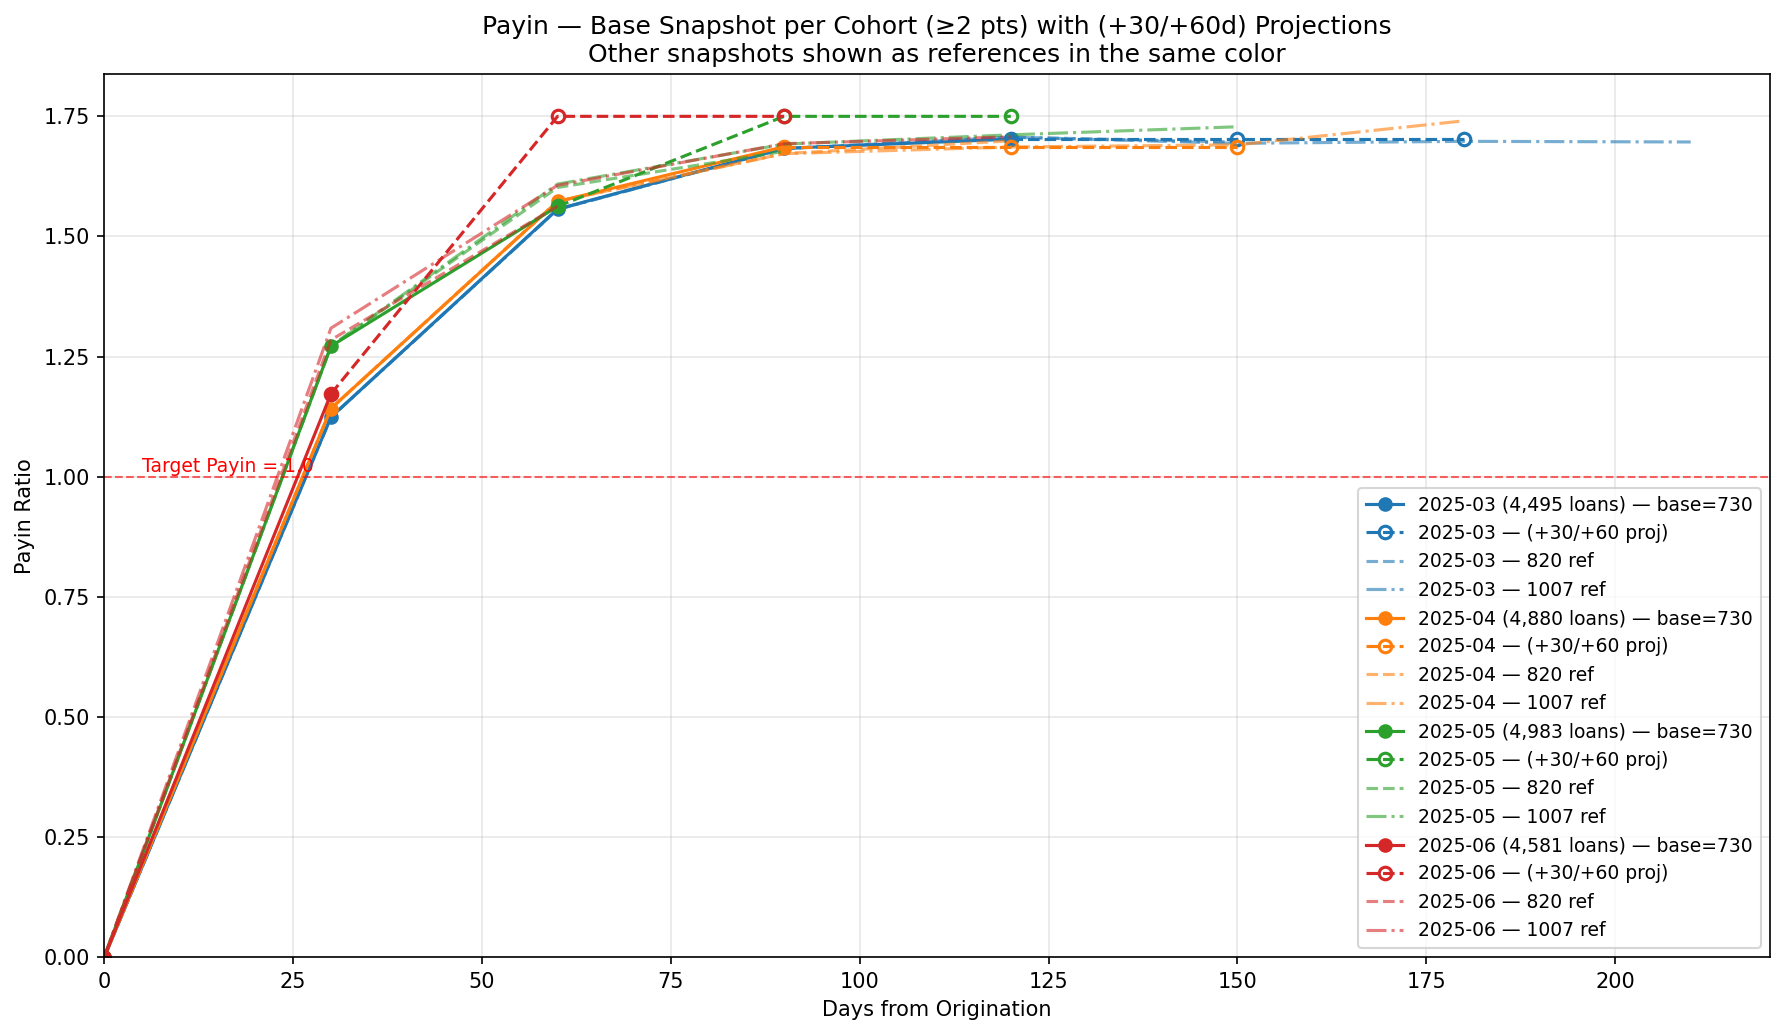

In [95]:
# plot_multi_cohorts_base_fallback.py
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_730  = Path("yieldcurvedata_730.csv")
DATA_820  = Path("yieldcurvedata_820.csv")
DATA_1007 = Path("yieldcurvedata_1007.csv")

COHORTS     = ["2025-03","2025-04", "2025-05","2025-06"]      # cohorts to show
DAY_GRID    = np.array([0,30,60,90,120,150,180,210])
PROJ_STEPS  = (30,60)
CAP         = 1.75
TARGET_LINE = 1.0
METHOD      = "logistic"                  # or "linear"
FIG_PATH    = Path("payin_multi_base_fallback.png")

# ---------- load & reduce ----------
def load_df(path: Path) -> pd.DataFrame:
    use = ["LoanID","OrigYear","OrigMonth","OriginatedAmount","Days_Since_Orig","PaidOffPaymentAmount"]
    df = pd.read_csv(path, usecols=use, low_memory=False).dropna(subset=["LoanID","OriginatedAmount","Days_Since_Orig"])
    df["Days_Since_Orig"] = df["Days_Since_Orig"].astype(int)
    df["PaidOffPaymentAmount"] = df["PaidOffPaymentAmount"].fillna(0.0)
    df["Cohort"] = df["OrigYear"].astype(int).astype(str) + "-" + df["OrigMonth"].astype(int).astype(str).str.zfill(2)
    return df

def cohort_curve(df: pd.DataFrame, cohort: str, grid=DAY_GRID) -> tuple[pd.DataFrame, int]:
    sub = df[df["Cohort"]==cohort].copy()
    if sub.empty: return pd.DataFrame(columns=["Days","PayinRatio"]), 0
    loans = sub["LoanID"].nunique()
    g = (sub.groupby(["LoanID","Days_Since_Orig"], as_index=False)
           .agg(PaidDay=("PaidOffPaymentAmount","sum"),
                OriginatedAmount=("OriginatedAmount","first"))
           .sort_values(["LoanID","Days_Since_Orig"]))
    g["CumPaid"] = g.groupby("LoanID", sort=False)["PaidDay"].cumsum()
    g["PayinRatio"] = (g["CumPaid"]/g["OriginatedAmount"]).clip(upper=CAP)

    idx = np.searchsorted(grid, g["Days_Since_Orig"].values, side="right") - 1
    idx = np.clip(idx, 0, len(grid)-1)
    g["GridDay"] = grid[idx]

    last = (g.groupby(["LoanID","GridDay"], as_index=False)
              .agg(PayinRatio=("PayinRatio","max"),
                   OriginatedAmount=("OriginatedAmount","first")))
    curve = (last.groupby("GridDay", as_index=False)
               .apply(lambda d: pd.Series({"PayinRatio": float(np.average(d["PayinRatio"], weights=d["OriginatedAmount"]))}))
               .reset_index()
               .rename(columns={"GridDay":"Days"}))

    # Ensure (0,0) anchor exists
    if 0 not in curve["Days"].values:
        curve = pd.concat([pd.DataFrame({"Days":[0], "PayinRatio":[0.0]}), curve], ignore_index=True)
    else:
        curve.loc[curve["Days"]==0, "PayinRatio"] = 0.0

    return curve.sort_values("Days").reset_index(drop=True), loans

# ---------- projections ----------
def recent_linear_projection(x, y, steps=PROJ_STEPS, window=20, cap=CAP):
    x = np.asarray(x, float); y = np.asarray(y, float)
    if x.size < 2: return {}
    ux, idx = np.unique(x, return_index=True); x, y = ux, y[idx]
    use = max(2, min(window, x.size))
    xs, ys = x[-use:], y[-use:]
    A = np.vstack([xs, np.ones_like(xs)]).T
    slope, _ = np.linalg.lstsq(A, ys, rcond=None)[0]
    last_x, last_y = x[-1], y[-1]
    return {int(last_x+h): float(min(cap, max(last_y, last_y + slope*h))) for h in steps}

def logistic_projection(x, y, steps=PROJ_STEPS, cap=CAP):
    try:
        from scipy.optimize import curve_fit
    except Exception:
        return recent_linear_projection(x, y, steps, cap=cap)
    def _sig(xx, L, k, x0): return L/(1+np.exp(-k*(xx-x0)))
    x = np.asarray(x, float); y = np.asarray(y, float)
    if x.size < 4:
        return recent_linear_projection(x, y, steps, cap=cap)
    L0 = max(float(y.max()), 1.2); k0 = 0.03; x00 = np.median(x)
    bounds = ([1.0, 1e-4, 0.0], [CAP, 1.0, 730.0])
    try:
        (L,k,x0), _ = curve_fit(_sig, x, y, p0=[L0,k0,x00], bounds=bounds, maxfev=10000)
        last_x, last_y = x[-1], y[-1]
        return {int(last_x+h): float(min(CAP, max(last_y, float(_sig(last_x+h, L, k, x0))))) for h in steps}
    except Exception:
        return recent_linear_projection(x, y, steps, cap=cap)

def project_from_curve(curve_df: pd.DataFrame, method="logistic"):
    curve_df = curve_df.sort_values("Days")
    x = curve_df["Days"].values; y = curve_df["PayinRatio"].values
    return logistic_projection(x, y) if method=="logistic" else recent_linear_projection(x, y)

# ---------- plotting with base fallback ----------
def pick_base_curve(c730, c820, c1007, min_pts=2):
    """Return (name, df) choosing the first curve with >= min_pts."""
    for name, cur in [("730", c730), ("820", c820), ("1007", c1007)]:
        if len(cur.dropna()) and cur["Days"].nunique() >= min_pts:
            return name, cur.sort_values("Days")
    return "730", c730.sort_values("Days")

df730, df820, df1007 = load_df(DATA_730), load_df(DATA_820), load_df(DATA_1007)

plt.figure(figsize=(12,7), dpi=150)
ax = plt.gca()
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, cohort in enumerate(COHORTS):
    color = colors[i % len(colors)]

    c730, n_loans = cohort_curve(df730, cohort)
    c820, _ = cohort_curve(df820, cohort)
    c1007,_ = cohort_curve(df1007, cohort)

    base_name, base_df = pick_base_curve(c730, c820, c1007, min_pts=2)

    # base observed (solid, filled markers)
    ax.plot(base_df["Days"], base_df["PayinRatio"],
            color=color, linestyle="-", marker="o", mfc=color, mec=color,
            label=f"{cohort} ({n_loans:,} loans) — base={base_name}")

    # projections (+30/+60) from base curve last point (hollow markers + dashed)
    proj = project_from_curve(base_df, method=METHOD)
    if proj:
        last_d = int(base_df["Days"].iloc[-1])
        last_y = float(base_df["PayinRatio"].iloc[-1])
        xs = [last_d] + sorted(proj)
        ys = [last_y] + [proj[k] for k in sorted(proj)]
        ax.plot(xs, ys, color=color, linestyle="--", marker="o", mfc="none", mec=color, mew=1.5,
                label=f"{cohort} — (+30/+60 proj)")

    # show the other snapshots (same color, different styles)
    if base_name != "730" and not c730.empty:
        ax.plot(c730["Days"], c730["PayinRatio"], color=color, linestyle=":", linewidth=1.5, alpha=0.6,
                label=f"{cohort} — 730 ref")
    if base_name != "820" and not c820.empty:
        ax.plot(c820["Days"], c820["PayinRatio"], color=color, linestyle="--", linewidth=1.5, alpha=0.6,
                label=f"{cohort} — 820 ref")
    if base_name != "1007" and not c1007.empty:
        ax.plot(c1007["Days"], c1007["PayinRatio"], color=color, linestyle="-.", linewidth=1.5, alpha=0.6,
                label=f"{cohort} — 1007 ref")

# axes from origin
ax.set_xlim(left=0); ax.set_ylim(bottom=0.0)
ax.axhline(TARGET_LINE, linestyle="--", linewidth=1, color="red", alpha=0.6)
ax.text(5, TARGET_LINE+0.01, f"Target Payin = {TARGET_LINE:.1f}", color="red", fontsize=9)

ax.set_title("Payin — Base Snapshot per Cohort (≥2 pts) with (+30/+60d) Projections\n"
             "Other snapshots shown as references in the same color")
ax.set_xlabel("Days from Origination")
ax.set_ylabel("Payin Ratio")
ax.grid(True, alpha=0.3)
ax.legend(loc="lower right", fontsize=9)
plt.tight_layout()

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# --------------------------------------------------------------------------------------
# Expected input for the base snapshot (df_base):
#   columns: ['LoanID','Cohort','OriginationDate','SnapshotDate','PayinRatio']
#     - OriginationDate, SnapshotDate: parsable to datetime
#     - Cohort: string like '2025-06' (year-month) or any label you use per cohort
#
# Optional reference snapshots (refs): dict(label -> DataFrame in same format as df_base)
#   e.g., refs = {
#       "820": df_820,     # snapshot taken on 8/20
#       "1007": df_1007,   # snapshot taken on 10/07
#   }
#
# Notes:
# - Uses TRUE days since each loan’s OriginDate: days_since_orig = SnapshotDate - OriginationDate
# - Aggregates by exact days; you can bin by 5 days by toggling BIN_DAYS > 1.
# - Projection is linear from the last two observed points; capped to MAX_PAYIN.
# --------------------------------------------------------------------------------------

BIN_DAYS   = 1      # change to 5 or 7 if you want smoother curves
MAX_PAYIN  = 1.75   # safety cap you mentioned before
PROJ_OFFSETS = [30, 60]  # +30/+60 days projections

def _prepare(df: pd.DataFrame, label: str) -> pd.DataFrame:
    d = df.copy()
    d["OriginationDate"] = pd.to_datetime(d["OriginationDate"])
    d["SnapshotDate"]    = pd.to_datetime(d["SnapshotDate"])
    d["days_since_orig"] = (d["SnapshotDate"] - d["OriginationDate"]).dt.days
    if BIN_DAYS > 1:
        d["day_key"] = (d["days_since_orig"] // BIN_DAYS) * BIN_DAYS
    else:
        d["day_key"] = d["days_since_orig"]

    # Aggregate to a single series per cohort & day
    agg = (
        d.groupby(["Cohort", "day_key"], as_index=False)
         .agg(PayinRatio=("PayinRatio", "mean"),
              loan_count=("LoanID", "nunique"))
    )
    agg["snapshot_label"] = label
    return agg

def _project_from_tail(x: np.ndarray, y: np.ndarray, add_days=PROJ_OFFSETS):
    """
    Linear projection using the last two observed points.
    Returns arrays (x_proj, y_proj).
    """
    if len(x) < 2:
        return np.array([]), np.array([])
    x1, x2 = x[-2], x[-1]
    y1, y2 = y[-2], y[-1]
    if x2 == x1:
        return np.array([]), np.array([])

    slope = (y2 - y1) / (x2 - x1)
    x_proj = np.array([x2 + d for d in add_days], dtype=float)
    y_proj = y2 + slope * (x_proj - x2)
    y_proj = np.clip(y_proj, 0, MAX_PAYIN)
    return x_proj, y_proj

def plot_payin_curves_with_true_origin(
    df_base: pd.DataFrame,
    refs: dict[str, pd.DataFrame] | None = None,
    title: str = "Payin — Base Snapshot per Cohort (true origination) with (+30/+60) Projections",
    target_payin: float | None = 1.0,
    figsize=(14,8)
):
    base_label = "base"
    base = _prepare(df_base, base_label)

    ref_curves = {}
    if refs:
        for lbl, df_ref in refs.items():
            ref_curves[lbl] = _prepare(df_ref, lbl)

    # Collect unique cohorts to keep colors consistent across base & refs
    cohorts = sorted(base["Cohort"].unique())
    # Build a color cycle keyed by cohort
    color_map = {}
    for i, c in enumerate(cohorts):
        color_map[c] = f"C{i % 10}"

    fig, ax = plt.subplots(figsize=figsize)

    legend_items = []

    # Plot per cohort
    for cohort in cohorts:
        # ---------- Base curve ----------
        g = base[base["Cohort"] == cohort].sort_values("day_key")
        x = g["day_key"].to_numpy()
        y = g["PayinRatio"].to_numpy()
        clr = color_map[cohort]

        if len(x) == 0:
            continue

        # solid line with markers
        ax.plot(x, y, marker="o", linewidth=2, color=clr,
                label=f"{cohort} — base")

        # (+30/+60) projection from last two observed points
        x_proj, y_proj = _project_from_tail(x, y, PROJ_OFFSETS)
        if x_proj.size > 0:
            ax.plot([x[-1], *x_proj], [y[-1], *y_proj],
                    linestyle="--", linewidth=2, color=clr,
                    label=f"{cohort} — (+30/+60) proj")
            ax.scatter(x_proj, y_proj, facecolors="none", edgecolors=clr)

        # ---------- Reference snapshots (same color, lighter/dashed) ----------
        for ref_label, ref_df in ref_curves.items():
            r = ref_df[ref_df["Cohort"] == cohort].sort_values("day_key")
            if r.empty:
                continue
            xr = r["day_key"].to_numpy()
            yr = r["PayinRatio"].to_numpy()
            style = ":" if ref_label == "1007" else "--"
            ax.plot(xr, yr, linestyle=style, linewidth=2, color=clr,
                    label=f"{cohort} — {ref_label} ref")

    # Target payin line
    if target_payin is not None:
        ax.axhline(target_payin, linestyle="--", linewidth=1.2, color="red")
        ax.text(0, target_payin + 0.02, f"Target Payin = {target_payin}",
                color="red")

    ax.set_xlabel("Days from Origination", fontsize=11)
    ax.set_ylabel("Payin Ratio", fontsize=11)
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.25)
    ax.legend(ncol=1, fontsize=9)
    plt.tight_layout()
    plt.show()


# --------------------------------------------------------------------------------------
# Example usage
df_base = pd.read_csv("yieldcurvedata_730.csv")
df_820  = pd.read_csv("yieldcurvedata_820.csv")
df_1007 = pd.read_csv("yieldcurvedata_1007.csv")  

plot_payin_curves_with_true_origin(
    df_base,
    refs={"820": df_820, "1007": df_1007},   # or None if you don't have refs
    title="Payin — Base Snapshot per Cohort (≥2 pts) with (+30/+60d) Projections\nOther snapshots shown as references in the same color",
    target_payin=1.0
)
# --------------------------------------------------------------------------------------


KeyError: 'SnapshotDate'

C:\Users\axu\AppData\Local\Temp\ipykernel_24936\157891688.py:101: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda d: pd.Series({
C:\Users\axu\AppData\Local\Temp\ipykernel_24936\157891688.py:101: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda d: pd.Series({
C:\Users\axu\AppData\Local\Temp\ipykernel_24936\157891688.py:101: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. 

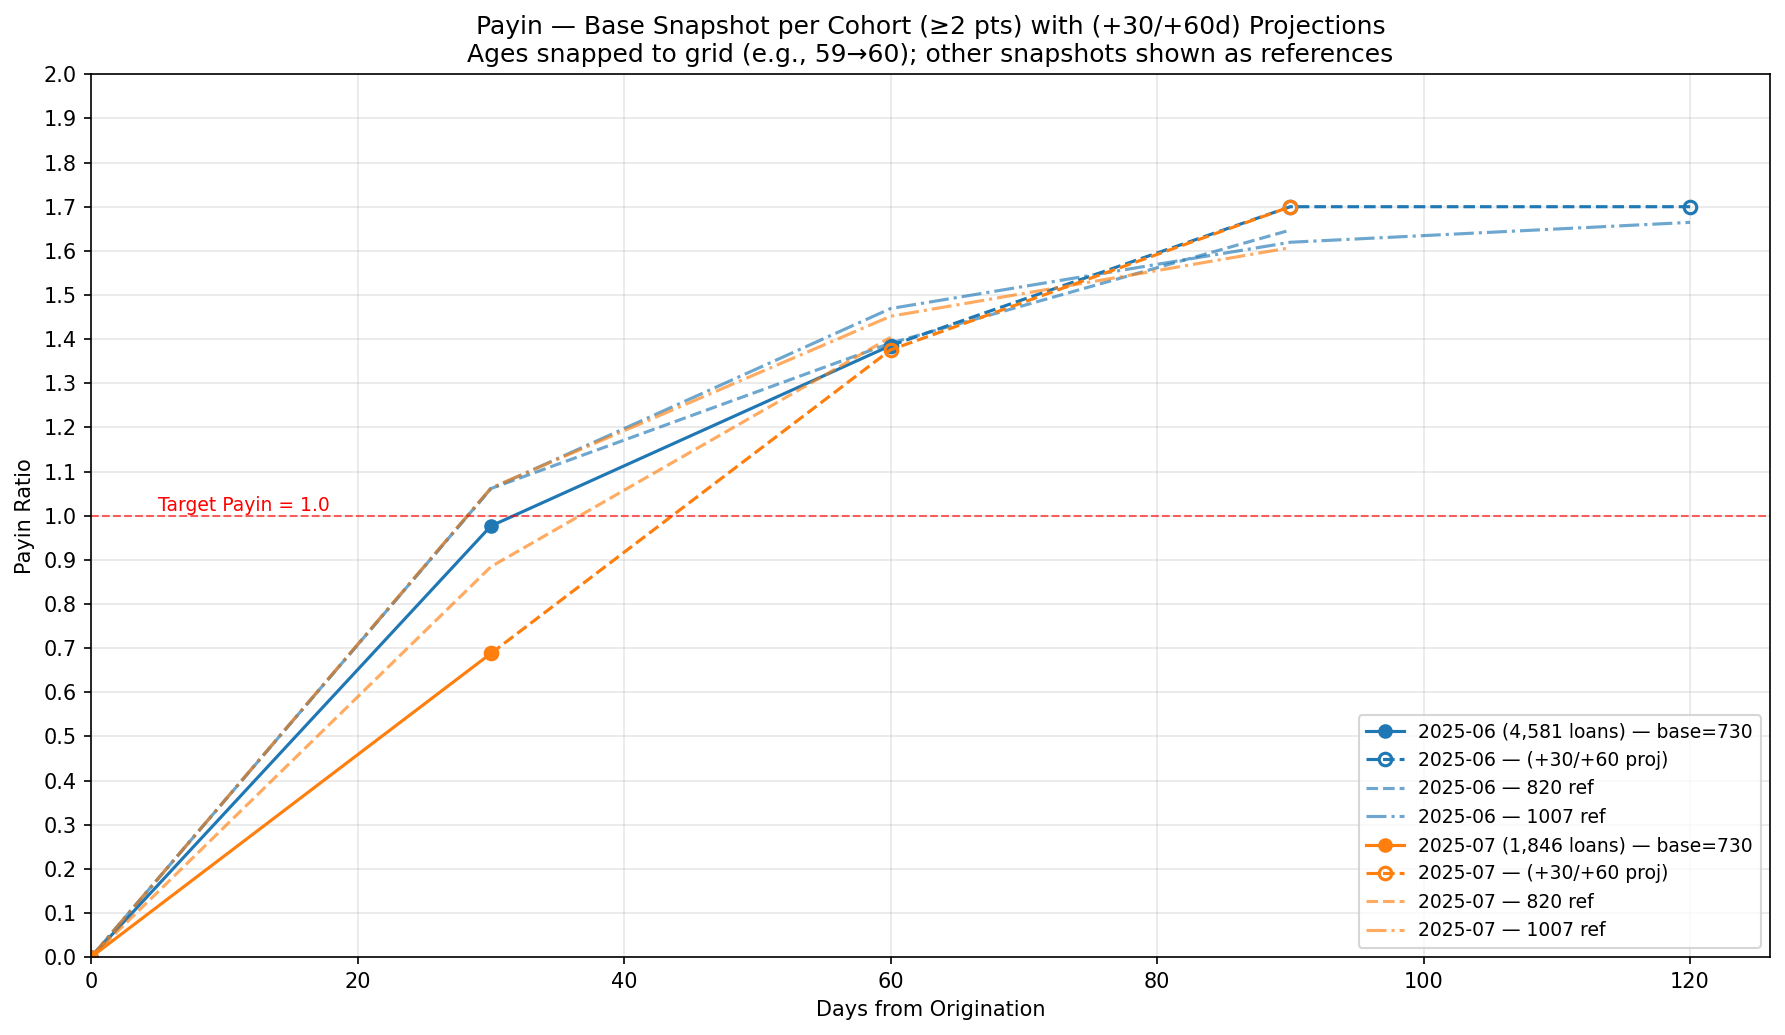

In [100]:
# payin_pipeline.py
# Complete pipeline: build cohort curves, snap to grid (~59->60), pick base snapshot, make +30/+60 projections,
# and plot multi-cohort chart with cohort-colored 730/base/820/1007 series.

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ============== Config ==============
DATA_730  = Path("yieldcurvedata_730.csv")
DATA_820  = Path("yieldcurvedata_820.csv")
DATA_1007 = Path("yieldcurvedata_1007.csv")

COHORTS      = ["2025-06", "2025-07"]        # cohorts to show
DAY_GRID     = np.array([0, 30, 60, 90, 120, 150, 180, 210])
SNAP_MODE    = "nearest"                     # "nearest"  (e.g., 59 -> 60), or "floor" with tol, or "ceil"
SNAP_TOL     = None                          # use e.g. 2 if SNAP_MODE == "floor" and you want 58/59->60
CAP          = 1.7                          # cap payin ratio
TARGET_LINE  = 1.0
PROJ_STEPS   = (30, 60)                      # project two dots
PROJ_METHOD  = "logistic"                    # "logistic" or "linear"
MIN_BASE_PTS = 2                             # base snapshot must have >= this many points

OUT_DIR  = Path("payin_out")
OUT_DIR.mkdir(parents=True, exist_ok=True)
FIG_PATH = OUT_DIR / "payin_multi_pipeline.png"
CSV_PATH = OUT_DIR / "payin_multi_pipeline_projection_points.csv"


# ============== Utilities ==============
def snap_to_grid(days, grid, mode="nearest", tol=None):
    """
    Map raw ages (days) to grid days.
      mode="floor"   -> last grid <= day
      mode="nearest" -> nearest grid day (e.g., 59->60)
      mode="ceil"    -> first grid >= day
    tol: if provided with floor, bump to the next grid when (next-grid - day) <= tol.
    """
    days = np.asarray(days, dtype=float)
    grid = np.asarray(grid, dtype=float)

    if mode == "nearest":
        idx = np.abs(days[:, None] - grid[None, :]).argmin(axis=1)
    elif mode == "ceil":
        idx = np.searchsorted(grid, days, side="left")
    else:  # floor (original), optional tolerance
        idx = np.searchsorted(grid, days, side="right") - 1
        if tol is not None:
            next_idx = np.clip(idx + 1, 0, len(grid) - 1)
            bump = (grid[next_idx] - days) <= tol
            idx = np.where(bump, next_idx, idx)

    idx = np.clip(idx, 0, len(grid) - 1)
    return grid[idx].astype(int)


# ============== Data loading & reduction ==============
def load_df(path: Path) -> pd.DataFrame:
    use = ["LoanID", "OrigYear", "OrigMonth", "OriginatedAmount", "Days_Since_Orig", "PaidOffPaymentAmount"]
    df = pd.read_csv(path, usecols=use, low_memory=False).dropna(subset=["LoanID", "OriginatedAmount", "Days_Since_Orig"])
    df["Days_Since_Orig"] = df["Days_Since_Orig"].astype(int)
    df["PaidOffPaymentAmount"] = df["PaidOffPaymentAmount"].fillna(0.0)
    df["Cohort"] = df["OrigYear"].astype(int).astype(str) + "-" + df["OrigMonth"].astype(int).astype(str).str.zfill(2)
    return df


def cohort_curve(df: pd.DataFrame, cohort: str, grid=DAY_GRID,
                 snap_mode=SNAP_MODE, snap_tol=SNAP_TOL, cap=CAP) -> tuple[pd.DataFrame, int]:
    """
    Build a cohort curve on the grid:
      - per-loan daily flows → cumulative → payin ratio (capped)
      - snap ages to grid (nearest/floor/ceil)
      - weighted average by originated amount
      - force (0,0) anchor
    Returns: (curve_df with cols Days, PayinRatio, loan_count)
    """
    sub = df[df["Cohort"] == cohort].copy()
    if sub.empty:
        return pd.DataFrame(columns=["Days", "PayinRatio"]), 0

    loan_cnt = sub["LoanID"].nunique()

    # Per-loan per-day flows
    g = (sub.groupby(["LoanID", "Days_Since_Orig"], as_index=False)
           .agg(PaidDay=("PaidOffPaymentAmount", "sum"),
                OriginatedAmount=("OriginatedAmount", "first"))
           .sort_values(["LoanID", "Days_Since_Orig"]))
    # Cumulative & ratio
    g["CumPaid"] = g.groupby("LoanID", sort=False)["PaidDay"].cumsum()
    g["PayinRatio"] = (g["CumPaid"] / g["OriginatedAmount"]).clip(upper=cap)

    # Snap to grid
    g["GridDay"] = snap_to_grid(g["Days_Since_Orig"].values, grid, mode=snap_mode, tol=snap_tol)

    # Last value per (loan, grid) then weighted pool to cohort
    last = (g.groupby(["LoanID", "GridDay"], as_index=False)
              .agg(PayinRatio=("PayinRatio", "max"),
                   OriginatedAmount=("OriginatedAmount", "first")))
    curve = (last.groupby("GridDay", as_index=False)
               .apply(lambda d: pd.Series({
                   "PayinRatio": float(np.average(d["PayinRatio"], weights=d["OriginatedAmount"]))
               }))
               .reset_index()
               .rename(columns={"GridDay": "Days"}))

    # Ensure (0,0) anchor
    if 0 not in curve["Days"].values:
        curve = pd.concat([pd.DataFrame({"Days": [0], "PayinRatio": [0.0]}), curve], ignore_index=True)
    else:
        curve.loc[curve["Days"] == 0, "PayinRatio"] = 0.0

    return curve.sort_values("Days").reset_index(drop=True), loan_cnt


# ============== Projections ==============
def recent_linear_projection(x, y, steps=PROJ_STEPS, window=20, cap=CAP):
    x = np.asarray(x, float); y = np.asarray(y, float)
    if x.size < 2: return {}
    ux, idx = np.unique(x, return_index=True); x, y = ux, y[idx]
    use = max(2, min(window, x.size))
    xs, ys = x[-use:], y[-use:]
    A = np.vstack([xs, np.ones_like(xs)]).T
    slope, _ = np.linalg.lstsq(A, ys, rcond=None)[0]
    last_x, last_y = x[-1], y[-1]
    return {int(last_x + h): float(min(cap, max(last_y, last_y + slope * h))) for h in steps}


def logistic_projection(x, y, steps=PROJ_STEPS, cap=CAP):
    try:
        from scipy.optimize import curve_fit
    except Exception:
        return recent_linear_projection(x, y, steps, cap=cap)

    def _sig(xx, L, k, x0): return L / (1 + np.exp(-k * (xx - x0)))
    x = np.asarray(x, float); y = np.asarray(y, float)
    if x.size < 4:
        return recent_linear_projection(x, y, steps, cap=cap)

    L0 = max(float(y.max()), 1.2); k0 = 0.03; x00 = np.median(x)
    bounds = ([1.0, 1e-4, 0.0], [CAP, 1.0, 730.0])
    try:
        (L, k, x0), _ = curve_fit(_sig, x, y, p0=[L0, k0, x00], bounds=bounds, maxfev=10000)
        last_x, last_y = x[-1], y[-1]
        out = {}
        for h in steps:
            yy = float(_sig(last_x + h, L, k, x0))
            out[int(last_x + h)] = float(min(CAP, max(last_y, yy)))
        return out
    except Exception:
        return recent_linear_projection(x, y, steps, cap=cap)


def project_from_curve(curve_df: pd.DataFrame, method=PROJ_METHOD):
    curve_df = curve_df.sort_values("Days")
    x = curve_df["Days"].values; y = curve_df["PayinRatio"].values
    return logistic_projection(x, y) if method == "logistic" else recent_linear_projection(x, y)


# ============== Base snapshot selection ==============
def pick_base_curve(c730, c820, c1007, min_pts=MIN_BASE_PTS):
    """Choose first snapshot with >= min_pts unique Days."""
    for name, cur in [("730", c730), ("820", c820), ("1007", c1007)]:
        if not cur.empty and cur["Days"].nunique() >= min_pts:
            return name, cur.sort_values("Days")
    # fallback
    return "730", c730.sort_values("Days")


# ============== Main build & plot ==============
def main():
    df730, df820, df1007 = load_df(DATA_730), load_df(DATA_820), load_df(DATA_1007)

    # colors
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # collect projection points for CSV
    proj_rows = []

    plt.figure(figsize=(12, 7), dpi=150)
    ax = plt.gca()

    for i, cohort in enumerate(COHORTS):
        color = colors[i % len(colors)]

        c730, n_loans = cohort_curve(df730, cohort)
        c820, _       = cohort_curve(df820, cohort)
        c1007, _      = cohort_curve(df1007, cohort)

        base_name, base_df = pick_base_curve(c730, c820, c1007, min_pts=MIN_BASE_PTS)

        # Base observed series (solid, filled markers)
        ax.plot(base_df["Days"], base_df["PayinRatio"],
                color=color, linestyle="-", marker="o", mfc=color, mec=color,
                label=f"{cohort} ({n_loans:,} loans) — base={base_name}")

        # Projections from base last point (dashed, hollow markers)
        proj = project_from_curve(base_df, method=PROJ_METHOD)
        if proj:
            last_d = int(base_df["Days"].iloc[-1]); last_y = float(base_df["PayinRatio"].iloc[-1])
            xs = [last_d] + sorted(proj); ys = [last_y] + [proj[k] for k in sorted(proj)]
            ax.plot(xs, ys, color=color, linestyle="--", marker="o", mfc="none", mec=color, mew=1.5,
                    label=f"{cohort} — (+30/+60 proj)")

            # stash for CSV
            proj_rows.append({
                "Cohort": cohort, "Base": base_name,
                "Last_Day": last_d, "Last_Payin": round(last_y, 3),
                "+30d": round(proj.get(last_d + 30, np.nan), 3),
                "+60d": round(proj.get(last_d + 60, np.nan), 3)
            })

        # Show other snapshots as references, same color
        if base_name != "730" and not c730.empty:
            ax.plot(c730["Days"], c730["PayinRatio"], color=color, linestyle=":",  linewidth=1.5, alpha=0.65,
                    label=f"{cohort} — 730 ref")
        if base_name != "820" and not c820.empty:
            ax.plot(c820["Days"], c820["PayinRatio"], color=color, linestyle="--", linewidth=1.5, alpha=0.65,
                    label=f"{cohort} — 820 ref")
        if base_name != "1007" and not c1007.empty:
            ax.plot(c1007["Days"], c1007["PayinRatio"], color=color, linestyle="-.", linewidth=1.5, alpha=0.65,
                    label=f"{cohort} — 1007 ref")

    # Axes & cosmetics
    ax.set_xlim(left=0); ax.set_ylim(bottom=0.0);ax.set_yticks(np.arange(0, 2.05, 0.1))
    ax.axhline(TARGET_LINE, linestyle="--", linewidth=1, color="red", alpha=0.6)
    ax.text(5, TARGET_LINE + 0.01, f"Target Payin = {TARGET_LINE:.1f}", color="red", fontsize=9)
    ax.set_title("Payin — Base Snapshot per Cohort (≥2 pts) with (+30/+60d) Projections\n"
                 "Ages snapped to grid (e.g., 59→60); other snapshots shown as references")
    ax.set_xlabel("Days from Origination"); ax.set_ylabel("Payin Ratio")
    ax.grid(True, alpha=0.3); ax.legend(loc="lower right", fontsize=9)
    plt.tight_layout()

    # plt.savefig(FIG_PATH, bbox_inches="tight")

    # # Export projection table
    # pd.DataFrame(proj_rows).to_csv(CSV_PATH, index=False)
    # print(f"Saved figure: {FIG_PATH}")
    # print(f"Saved projections CSV: {CSV_PATH}")


if __name__ == "__main__":
    main()
